SVM Test Accuracy: 0.9433333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       148
           1       0.94      0.95      0.94       152

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



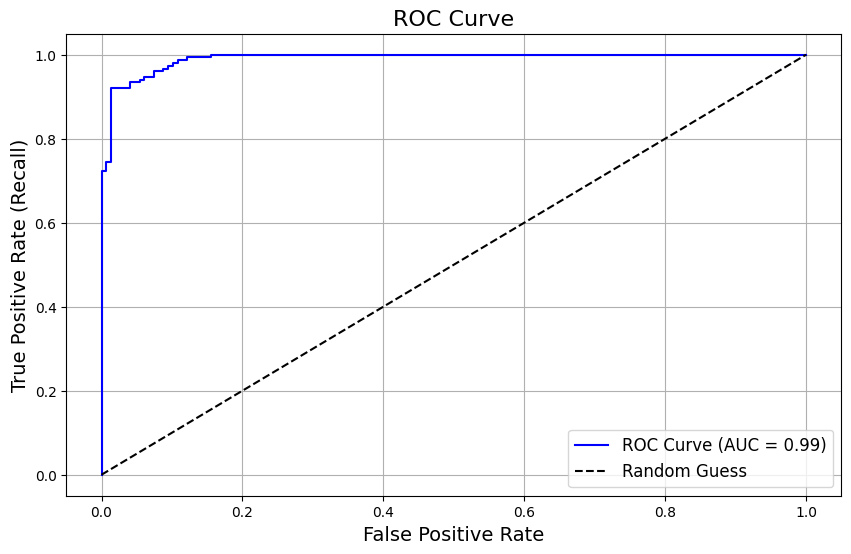

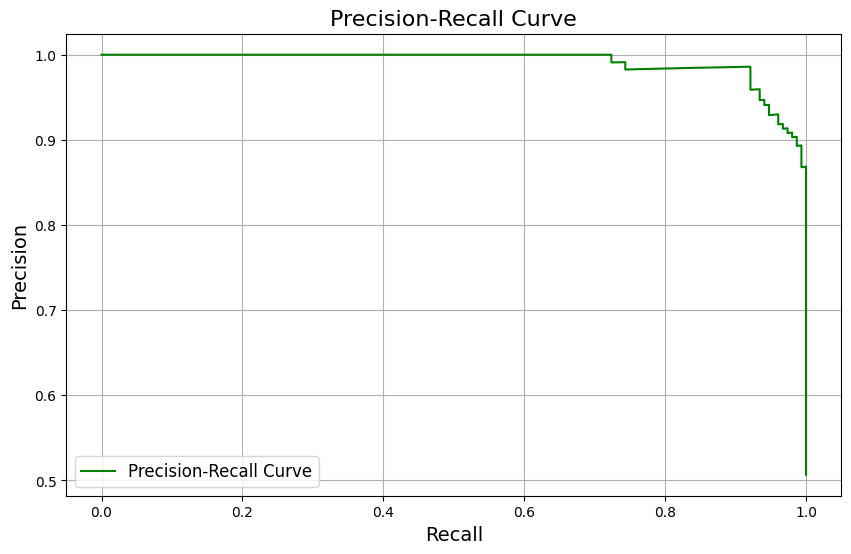

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    classification_report,
    accuracy_score,
)
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = 'DataSet.csv'  # Update with your actual path
df = pd.read_csv(file_path)

# Preprocess the dataset
df.fillna(df.mean(), inplace=True)
df['needs_scaling'] = df.apply(
    lambda row: 1 if row['cpu'] > 70 or row['ram'] > 85 or row['disk'] > 70 or row['network'] > 15 else 0, axis=1
)

# Define features and target
X = df.drop(columns=['needs_scaling'])
y = df['needs_scaling']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optional: Balance the dataset using SMOTE (if the dataset is imbalanced)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train an SVM model
svm = SVC(kernel='rbf', C=0.5, probability=True, random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
y_prob = svm.predict_proba(X_test)[:, 1]
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate (Recall)", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.show()
